# CIFAR-10 Dataset: Object Classification

**Using ConvNets, Batch Normalization, Data Augmentation. 84.47% Validation Accuracy. 83.92% Testing Accuracy.**

**Acesso do arquivo base usado em: https://github.com/raahatg21/CIFAR-10-Dataset-with-Keras/blob/master/CIFAR-10_8392.ipynb**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from keras import models
from keras import layers
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


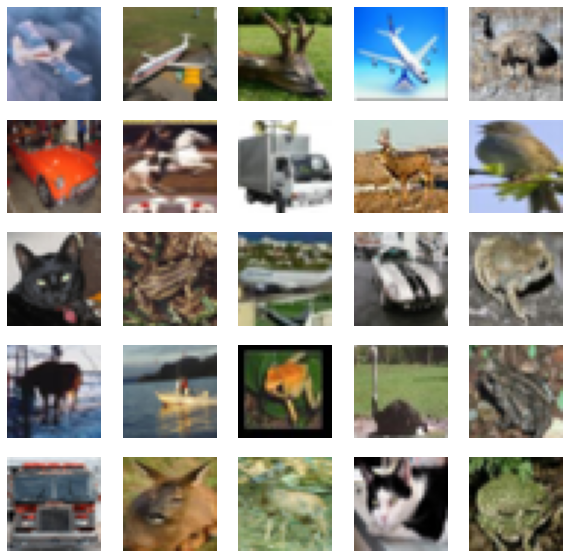

In [4]:
ROWS = 5 #Mostra as imagens aleatÃ³rias usadas para o teste

y = X_test.astype("uint8")

fig, axes1 = plt.subplots(ROWS,ROWS,figsize=(10,10))
for j in range(ROWS):
  for k in range(ROWS):
    i = np.random.choice(range(len(y)))
    axes1[j][k].set_axis_off()
    axes1[j][k].imshow(y[i:i+1][0])

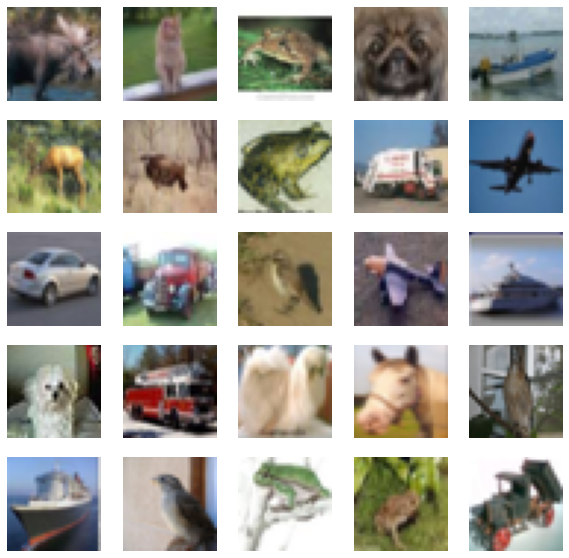

In [5]:
ROWS = 5

y = X_train.astype("uint8") #Mostra as imagens aleatÃ³rias para o treinamento

fig, axes2 = plt.subplots(ROWS,ROWS,figsize=(10,10))
for j in range(ROWS):
  for k in range(ROWS):
    i = np.random.choice(range(len(y)))
    axes2[j][k].set_axis_off()
    axes2[j][k].imshow(y[i:i+1][0])

In [6]:
# PrÃ© processamento dos dados

X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [7]:
X_train = X_train.astype('float32')
X_train /= 255
X_test = X_test.astype('float32')
X_test /= 255

In [8]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [9]:
# PrÃ© processamento dos Labels

y_train.shape, y_test.shape

((50000, 1), (10000, 1))

In [10]:
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

In [11]:
y_train.shape, y_test.shape

((50000, 10), (10000, 10))

In [12]:
#  Dividindo conjuntos de treinamento e de validaÃ§Ã£o

X_val = X_test[:5000]
y_val = y_test[:5000]

X_test = X_test[5000:]
y_test = y_test[5000:]

In [13]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3),
 (50000, 10),
 (5000, 32, 32, 3),
 (5000, 10),
 (5000, 32, 32, 3),
 (5000, 10))

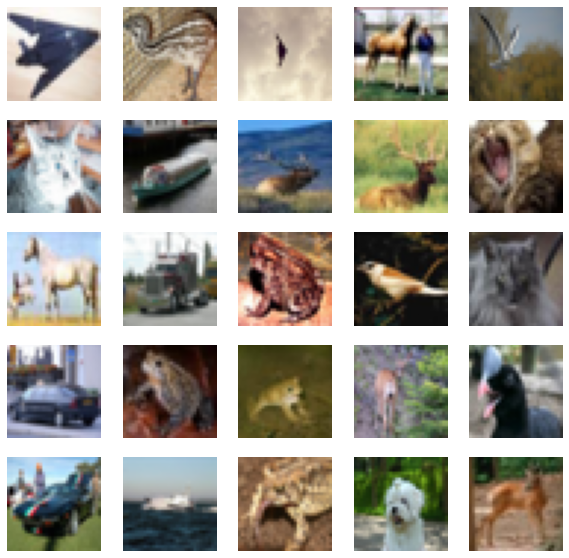

In [14]:
ROWS = 5

y = X_val.astype("float32") #Mostra imagens aleatÃ³rias usadas para a validaÃ§Ã£o

fig, axes3 = plt.subplots(ROWS,ROWS,figsize=(10,10))
for j in range(ROWS):
  for k in range(ROWS):
    i = np.random.choice(range(len(y)))
    axes3[j][k].set_axis_off()
    axes3[j][k].imshow(y[i:i+1][0])

In [15]:
# ArgumentaÃ§Ã£o dos dados

datagen = ImageDataGenerator(rotation_range = 10, width_shift_range = 0.1, height_shift_range = 0.1, shear_range = 0.1, zoom_range = 0.1, horizontal_flip = True, fill_mode = 'nearest')
datagen.fit(X_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in true_divide


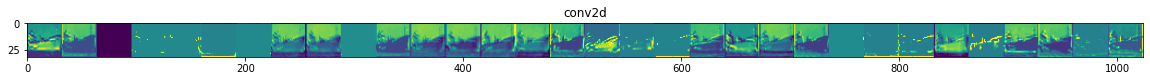

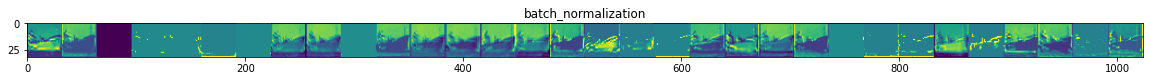

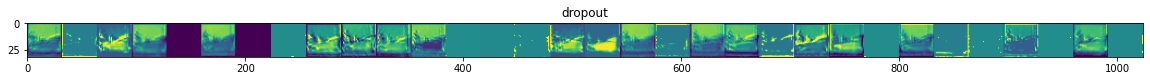

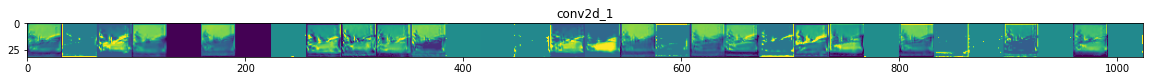

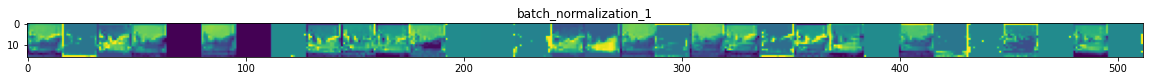

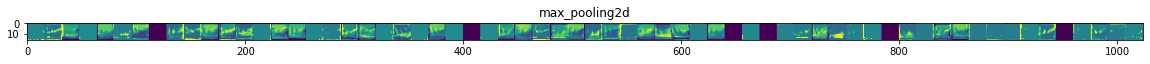

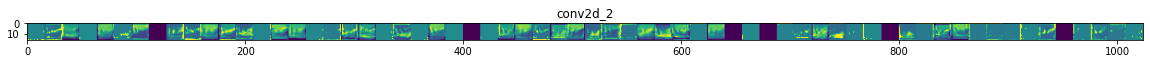

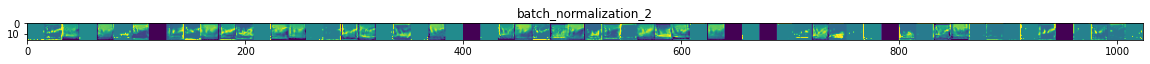

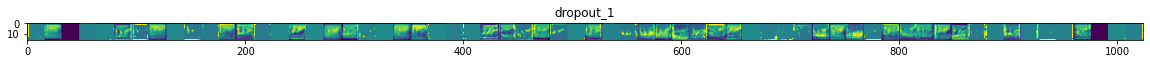

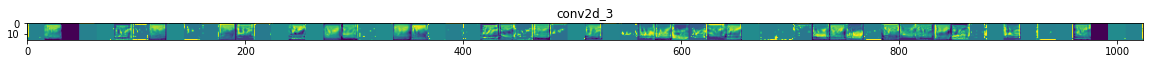

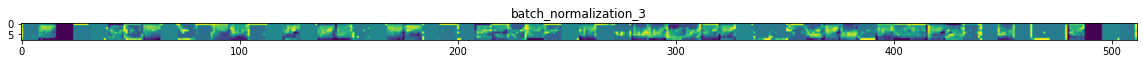

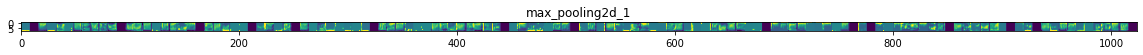

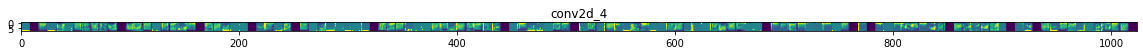

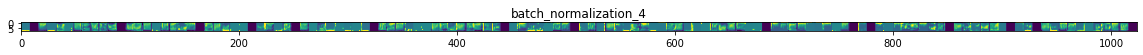

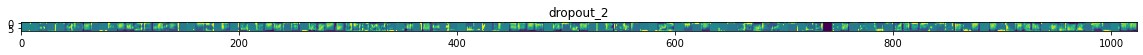

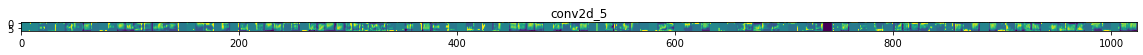

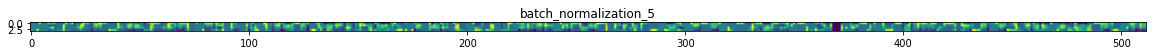

In [16]:
# Construindo o modelo CNN

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation = 'relu', padding = 'same', input_shape = (32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2, 2))
#----------------------------------------------------------------------------
# Define um novo modelo onde a entrada Ã© uma imagem de teste qualquer
# SaÃ­da Ã© representada pelas camadas intermediÃ¡rias  
# do antigo modelo depois do primeiro
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
#y = a imagem selecionada aleatÃ³riamente para teste.
x = X_test.astype("float32")
y = x[2:3]
# Vamos rodar a imagem na rede de visualizaÃ§Ã£o
# para obter todas as representaÃ§Ãµes intermediÃ¡rias da imagem
successive_feature_maps = visualization_model.predict(y)
# Recebe o nome das layers e entÃ£o sÃ£o colocadas no grÃ¡fico
layer_names = [layer.name for layer in model.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  #print(feature_map.shape)
  if len(feature_map.shape) == 4:
    
    # Plota o mapa de caracterÃ­sticas para a Conv2D atÃ© o maxpool layers, e nÃ£o os layers totalmente conectados
   
    n_features = feature_map.shape[-1]  # numero de caracterÃ­sticas no mapa de caracterÃ­sticas
    size       = feature_map.shape[ 1]  # formato do mapa de caraterÃ­sticas (1, size, size, n_features)
    # Iremos intitular nossas imagens nessa matrix
    display_grid = np.zeros((size, size * n_features))
    
    # PÃ³s processamento da caracterÃ­stica na forma visual
    for i in range(n_features):
      y  = feature_map[0, :, :, i]
      y -= y.mean()
      y /= y.std ()
      y *=  64
      y += 128
      y  = np.clip(y, 0, 255).astype('uint8')
      # Coloca cada filtro na forma horizontal
      display_grid[:, i * size : (i + 1) * size] = y
# Mostra a divisÃ£o e a imagem do mapa de caracterÃ­sticas
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )
#----------------------------------------------------------------------------
model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation = 'softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

In [18]:
# Compilando o modelo

model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [19]:
# Criando o Callback

callback = [ReduceLROnPlateau(monitor = 'val_loss', patience = 2, factor = 0.1, min_lr = 0.001)]

In [20]:
# Fazendo o Treinamento do modelo

history = model.fit_generator(datagen.flow(X_train, y_train, batch_size = 20), steps_per_epoch = 2000, epochs = 16, validation_data = (X_val, y_val), validation_steps = 500, callbacks = callback)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/16
2000/2000 [==============================] - 28s 14ms/step - loss: 1.7318 - accuracy: 0.4108 - val_loss: 1.1668 - val_accuracy: 0.5966
Epoch 2/16
2000/2000 [==============================] - 27s 14ms/step - loss: 1.1648 - accuracy: 0.5930 - val_loss: 0.9622 - val_accuracy: 0.6758
Epoch 3/16
2000/2000 [==============================] - 27s 13ms/step - loss: 1.0158 - accuracy: 0.6473 - val_loss: 0.8320 - val_accuracy: 0.7186
Epoch 4/16
2000/2000 [==============================] - 27s 13ms/step - loss: 0.9309 - accuracy: 0.6775 - val_loss: 0.7715 - val_accuracy: 0.7388
Epoch 5/16
2000/2000 [==============================] - 27s 14ms/step - loss: 0.8623 - accuracy: 0.7066 - val_loss: 0.6974 - val_accuracy: 0.7734
Epoch 6/16
2000/2000 [==============================] - 27s 14ms/step - loss: 0.8218 - accuracy: 0.7207 - val_loss: 0.8249 - val_accuracy: 0.7320
Epoch 7/16
2000/2000 [==========================

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

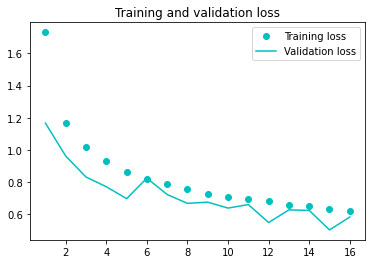

In [22]:
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'co', label='Training loss')
plt.plot(epochs, val_loss, 'c', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

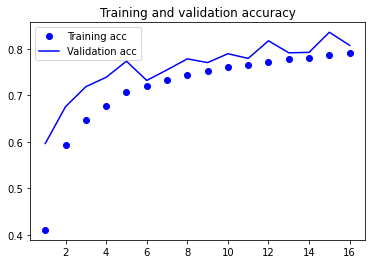

In [23]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

In [24]:
# Testando modelo

test_loss, test_acc = model.evaluate(X_test, y_test)
test_loss, test_acc

157/157 [==============================] - 1s 4ms/step - loss: 0.5762 - accuracy: 0.8060


(0.5761911869049072, 0.8059999942779541)

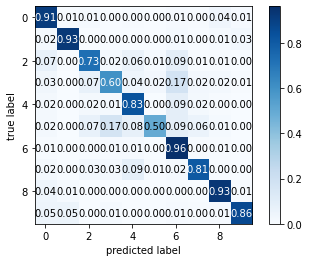

In [25]:
#matriz de confusÃ£o model
y_pred = model.predict(X_test)
y_test.argmax(axis=1).shape, y_pred.argmax(axis=1).shape

multiclass = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

fig, ax = plot_confusion_matrix(multiclass, colorbar=True, show_absolute=False, show_normed=True)
ax.margins(10,10) #just change the values til adjust to your screen.
plt.show()

Agora Ã© feita a repetiÃ§Ã£o das criaÃ§Ã£o de um modelo CNN para analisar os dados obtidos. Vamos criar 2 novos modelos, model1 e model2.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in true_divide


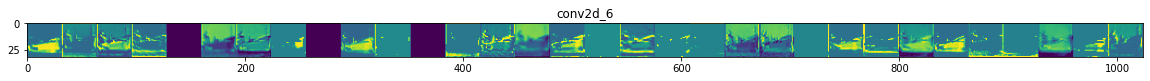

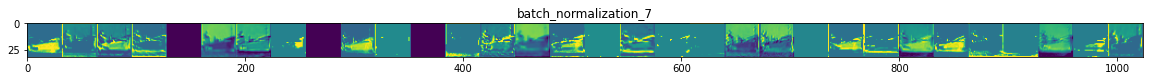

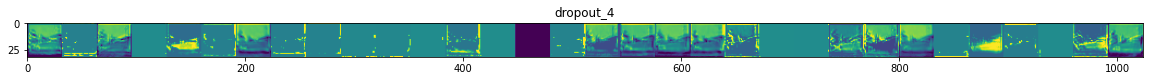

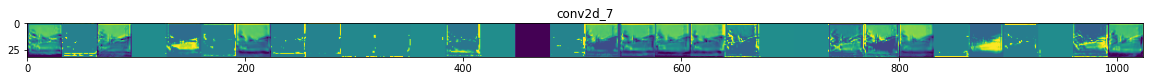

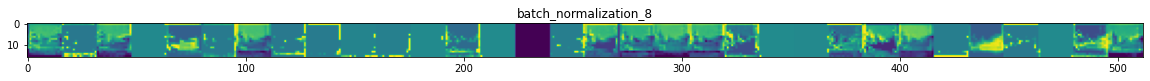

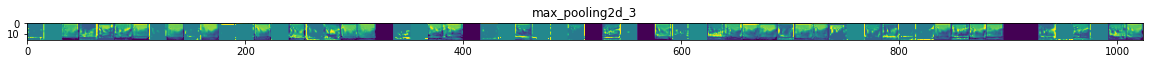

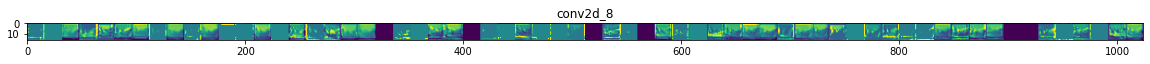

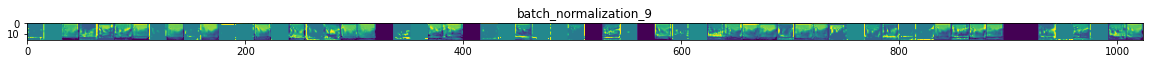

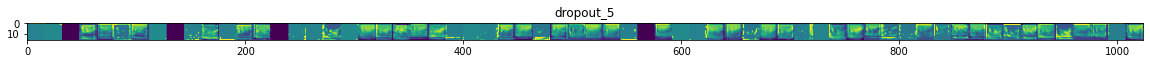

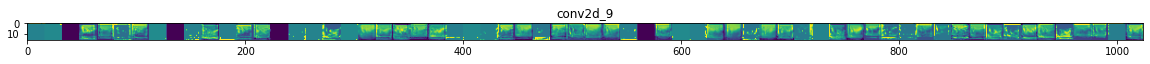

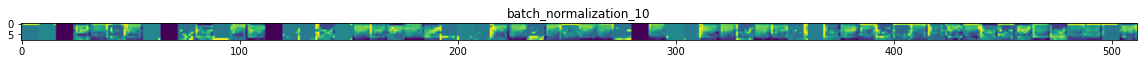

In [26]:
# Construindo o modelo CNN (model1)

model1 = models.Sequential()

model1.add(layers.Conv2D(32, (3, 3), activation = 'relu', padding = 'same', input_shape = (32, 32, 3)))
model1.add(layers.BatchNormalization())
model1.add(layers.Dropout(0.25))
model1.add(layers.Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))
model1.add(layers.BatchNormalization())
model1.add(layers.MaxPooling2D(2, 2))

model1.add(layers.Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
model1.add(layers.BatchNormalization())
model1.add(layers.Dropout(0.25))
model1.add(layers.Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
model1.add(layers.BatchNormalization())
model1.add(layers.MaxPooling2D(2, 2))
#----------------------------------------------------------------------------
# Define um novo modelo onde a entrada Ã© uma imagem de teste qualquer
# SaÃ­da Ã© representada pelas camadas intermediÃ¡rias  
# do antigo modelo depois do primeiro
successive_outputs1 = [layer.output for layer in model1.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model1 = tf.keras.models.Model(inputs = model1.input, outputs = successive_outputs1)
#y = a imagem selecionada aleatÃ³riamente para teste.
x = X_test.astype("float32")
y = x[2:3]
# Vamos rodar a imagem na rede de visualizaÃ§Ã£o
# para obter todas as representaÃ§Ãµes intermediÃ¡rias da imagem
successive_feature_maps1 = visualization_model1.predict(y)
# Recebe o nome das layers e entÃ£o sÃ£o colocadas no grÃ¡fico
layer_names = [layer.name for layer in model1.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps1):
  #print(feature_map.shape)
  if len(feature_map.shape) == 4:
    
    # Plota o mapa de caracterÃ­sticas para a Conv2D atÃ© o maxpool layers, e nÃ£o os layers totalmente conectados
   
    n_features1 = feature_map.shape[-1]  # numero de caracterÃ­sticas no mapa de caracterÃ­sticas
    size1       = feature_map.shape[ 1]  # formato do mapa de caraterÃ­sticas (1, size, size, n_features)
    # Iremos intitular nossas imagens nessa matrix
    display_grid1 = np.zeros((size1, size1 * n_features1))
    
    # PÃ³s processamento da caracterÃ­stica na forma visual
    for i in range(n_features1):
      y  = feature_map[0, :, :, i]
      y -= y.mean()
      y /= y.std ()
      y *=  64
      y += 128
      y  = np.clip(y, 0, 255).astype('uint8')
      # Coloca cada filtro na forma horizontal
      display_grid1[:, i * size1 : (i + 1) * size1] = y
# Mostra a divisÃ£o e a imagem do mapa de caracterÃ­sticas
    scale1 = 20. / n_features1
    plt.figure( figsize=(scale1 * n_features1, scale1) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid1, aspect='auto', cmap='viridis' )
#----------------------------------------------------------------------------
model1.add(layers.Flatten())
model1.add(layers.Dense(128, activation = 'relu'))
model1.add(layers.BatchNormalization())
model1.add(layers.Dropout(0.5))
model1.add(layers.Dense(10, activation = 'softmax'))

In [27]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_4 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)       

In [28]:
# Compilando o modelo (model1)

model1.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [29]:
# Criando o Callback (model1)

callback = [ReduceLROnPlateau(monitor = 'val_loss', patience = 2, factor = 0.1, min_lr = 0.001)]

In [30]:
# Fazendo o Treinamento

history1 = model1.fit_generator(datagen.flow(X_train, y_train, batch_size = 20), steps_per_epoch = 2000, epochs = 16, validation_data = (X_val, y_val), validation_steps = 500, callbacks = callback)

Epoch 1/16
2000/2000 [==============================] - 26s 13ms/step - loss: 1.6161 - accuracy: 0.4392 - val_loss: 1.3288 - val_accuracy: 0.5766
Epoch 2/16
2000/2000 [==============================] - 25s 13ms/step - loss: 1.2035 - accuracy: 0.5803 - val_loss: 1.2083 - val_accuracy: 0.5970
Epoch 3/16
2000/2000 [==============================] - 25s 13ms/step - loss: 1.0804 - accuracy: 0.6252 - val_loss: 0.9607 - val_accuracy: 0.6834
Epoch 4/16
2000/2000 [==============================] - 25s 13ms/step - loss: 1.0075 - accuracy: 0.6514 - val_loss: 0.8333 - val_accuracy: 0.7170
Epoch 5/16
2000/2000 [==============================] - 25s 13ms/step - loss: 0.9643 - accuracy: 0.6689 - val_loss: 0.9476 - val_accuracy: 0.6804
Epoch 6/16
2000/2000 [==============================] - 25s 13ms/step - loss: 0.9251 - accuracy: 0.6836 - val_loss: 0.7923 - val_accuracy: 0.7348
Epoch 7/16
2000/2000 [==============================] - 25s 13ms/step - loss: 0.8986 - accuracy: 0.6913 - val_loss: 0.8686 -

In [31]:
acc1 = history1.history['accuracy']
val_acc1 = history1.history['val_accuracy']
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']

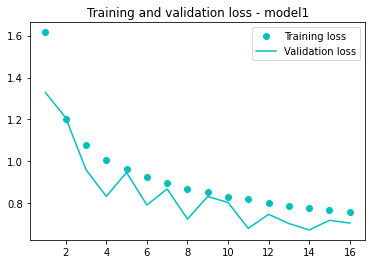

In [32]:
epochs1 = range(1, len(acc1) + 1)

plt.plot(epochs1, loss1, 'co', label='Training loss')
plt.plot(epochs1, val_loss1, 'c', label='Validation loss')
plt.title('Training and validation loss - model1')
plt.legend()
plt.show()

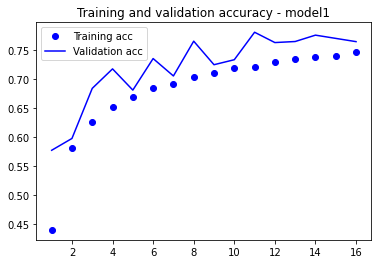

In [33]:
plt.plot(epochs1, acc1, 'bo', label='Training acc')
plt.plot(epochs1, val_acc1, 'b', label='Validation acc')
plt.title('Training and validation accuracy - model1')
plt.legend()
plt.show()

In [34]:
# Testando (model1)

test_loss1, test_acc1 = model1.evaluate(X_test, y_test)
test_loss1, test_acc1

157/157 [==============================] - 1s 3ms/step - loss: 0.6799 - accuracy: 0.7718


(0.6798602342605591, 0.7717999815940857)

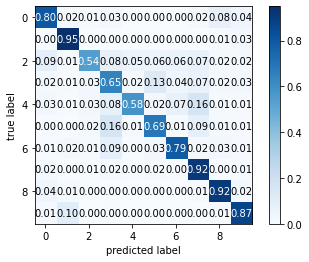

In [35]:
#matriz de confusÃ£o model1
y_pred1 = model1.predict(X_test)
y_test.argmax(axis=1).shape, y_pred1.argmax(axis=1).shape

multiclass1 = confusion_matrix(y_test.argmax(axis=1), y_pred1.argmax(axis=1))
class_names1 = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

fig, ax1 = plot_confusion_matrix(multiclass1, colorbar=True, show_absolute=False, show_normed=True)
ax1.margins(10,10) #just change the values til adjust to your screen.
plt.show()

Parte referente ao modelo 2 (model2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


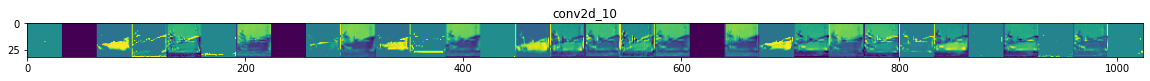

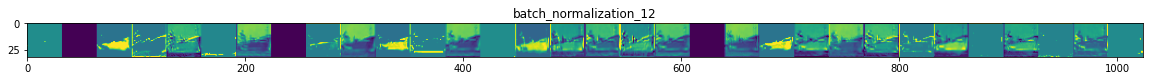

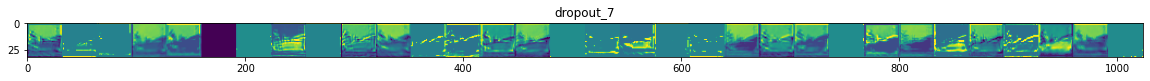

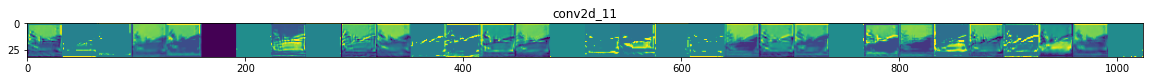

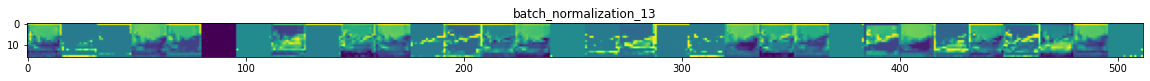

In [36]:
# Construindo o modelo CNN (model2)

model2 = models.Sequential()

model2.add(layers.Conv2D(32, (3, 3), activation = 'relu', padding = 'same', input_shape = (32, 32, 3)))
model2.add(layers.BatchNormalization())
model2.add(layers.Dropout(0.25))
model2.add(layers.Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPooling2D(2, 2))

#----------------------------------------------------------------------------
# Define um novo modelo onde a entrada Ã© uma imagem de teste qualquer
# SaÃ­da Ã© representada pelas camadas intermediÃ¡rias  
# do antigo modelo depois do primeiro
successive_outputs2 = [layer.output for layer in model2.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model2 = tf.keras.models.Model(inputs = model2.input, outputs = successive_outputs2)
#y = a imagem selecionada aleatÃ³riamente para teste.
x = X_test.astype("float32")
y = x[2:3]
# Vamos rodar a imagem na rede de visualizaÃ§Ã£o
# para obter todas as representaÃ§Ãµes intermediÃ¡rias da imagem
successive_feature_maps2 = visualization_model2.predict(y)
# Recebe o nome das layers e entÃ£o sÃ£o colocadas no grÃ¡fico
layer_names = [layer.name for layer in model2.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps2):
  #print(feature_map.shape)
  if len(feature_map.shape) == 4:
    
    # Plota o mapa de caracterÃ­sticas para a Conv2D atÃ© o maxpool layers, e nÃ£o os layers totalmente conectados
   
    n_features2 = feature_map.shape[-1]  # numero de caracterÃ­sticas no mapa de caracterÃ­sticas
    size2       = feature_map.shape[ 1]  # formato do mapa de caraterÃ­sticas (1, size, size, n_features)
    # Iremos intitular nossas imagens nessa matrix
    display_grid2 = np.zeros((size2, size2 * n_features2))
    
    # PÃ³s processamento da caracterÃ­stica na forma visual
    for i in range(n_features2):
      y  = feature_map[0, :, :, i]
      y -= y.mean()
      y /= y.std ()
      y *=  64
      y += 128
      y  = np.clip(y, 0, 255).astype('uint8')
      # Coloca cada filtro na forma horizontal
      display_grid2[:, i * size2 : (i + 1) * size2] = y
# Mostra a divisÃ£o e a imagem do mapa de caracterÃ­sticas
    scale2 = 20. / n_features2
    plt.figure( figsize=(scale2 * n_features2, scale2) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid2, aspect='auto', cmap='viridis' )
#----------------------------------------------------------------------------
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation = 'relu'))
model2.add(layers.BatchNormalization())
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(10, activation = 'softmax'))

In [37]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_12 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_7 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_13 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)             

In [38]:
# Compilando o modelo (model1)

model2.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [39]:
# Criando o Callback (model1)

callback = [ReduceLROnPlateau(monitor = 'val_loss', patience = 2, factor = 0.1, min_lr = 0.001)]

In [40]:
# Fazendo o Treinamento

history2 = model2.fit_generator(datagen.flow(X_train, y_train, batch_size = 20), steps_per_epoch = 2000, epochs = 16, validation_data = (X_val, y_val), validation_steps = 500, callbacks = callback)

Epoch 1/16
2000/2000 [==============================] - 24s 12ms/step - loss: 1.7013 - accuracy: 0.3974 - val_loss: 1.6928 - val_accuracy: 0.4506
Epoch 2/16
2000/2000 [==============================] - 24s 12ms/step - loss: 1.3918 - accuracy: 0.5077 - val_loss: 9.0645 - val_accuracy: 0.3812
Epoch 3/16
2000/2000 [==============================] - 23s 12ms/step - loss: 1.3216 - accuracy: 0.5394 - val_loss: 2.5233 - val_accuracy: 0.5172
Epoch 4/16
2000/2000 [==============================] - 24s 12ms/step - loss: 1.2711 - accuracy: 0.5540 - val_loss: 1.2958 - val_accuracy: 0.5722
Epoch 5/16
2000/2000 [==============================] - 24s 12ms/step - loss: 1.2455 - accuracy: 0.5688 - val_loss: 1.3952 - val_accuracy: 0.5912
Epoch 6/16
2000/2000 [==============================] - 24s 12ms/step - loss: 1.2232 - accuracy: 0.5745 - val_loss: 1.3110 - val_accuracy: 0.6338
Epoch 7/16
2000/2000 [==============================] - 24s 12ms/step - loss: 1.2006 - accuracy: 0.5848 - val_loss: 1.0831 -

In [41]:
acc2 = history2.history['accuracy']
val_acc2 = history2.history['val_accuracy']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

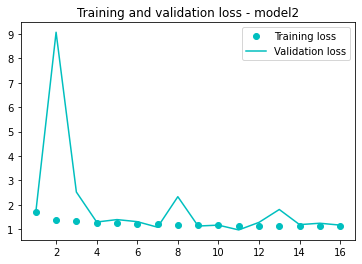

In [42]:
epochs2 = range(1, len(acc2) + 1)

plt.plot(epochs2, loss2, 'co', label='Training loss')
plt.plot(epochs2, val_loss2, 'c', label='Validation loss')
plt.title('Training and validation loss - model2')
plt.legend()
plt.show()

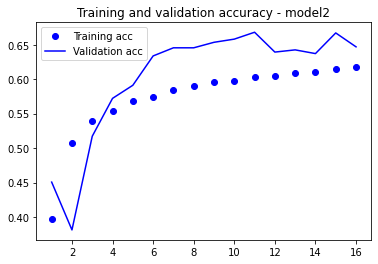

In [43]:
plt.plot(epochs2, acc2, 'bo', label='Training acc')
plt.plot(epochs2, val_acc2, 'b', label='Validation acc')
plt.title('Training and validation accuracy - model2')
plt.legend()
plt.show()

In [44]:
# Testando

test_loss2, test_acc2 = model2.evaluate(X_test, y_test)
test_loss2, test_acc2

157/157 [==============================] - 0s 3ms/step - loss: 1.4396 - accuracy: 0.6448


(1.4395707845687866, 0.6448000073432922)

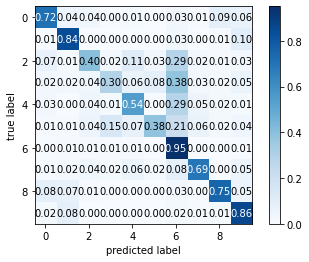

In [45]:
#matriz de confusÃ£o model2
y_pred2 = model2.predict(X_test)
y_test.argmax(axis=1).shape, y_pred2.argmax(axis=1).shape

multiclass2 = confusion_matrix(y_test.argmax(axis=1), y_pred2.argmax(axis=1))
class_names2 = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

fig, ax2 = plot_confusion_matrix(multiclass2, colorbar=True, show_absolute=False, show_normed=True)
ax2.margins(10,10) #just change the values til adjust to your screen.
plt.show()